In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Loading the datasets from the directory**

In [3]:
data = pd.read_csv("D:\\SKAY\\Projects\\KEEP\\VScode\\Ocular Recognition Disease\\ocular_data\\full_df.csv")
data.head(20)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


In [4]:
def has_condn(term,text):
    if term in text:
        return 1
    else:
        return 0

Attaching labels based whether cataract is present on which eye (left/right)

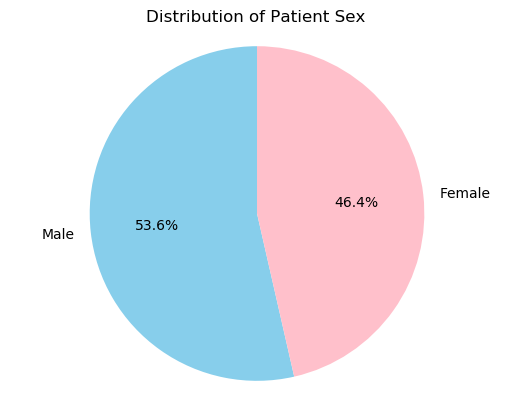

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = data['Patient Sex'].value_counts()
colors=['skyblue','pink']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,colors=colors)

plt.title('Distribution of Patient Sex ')

plt.axis('equal')
plt.show()


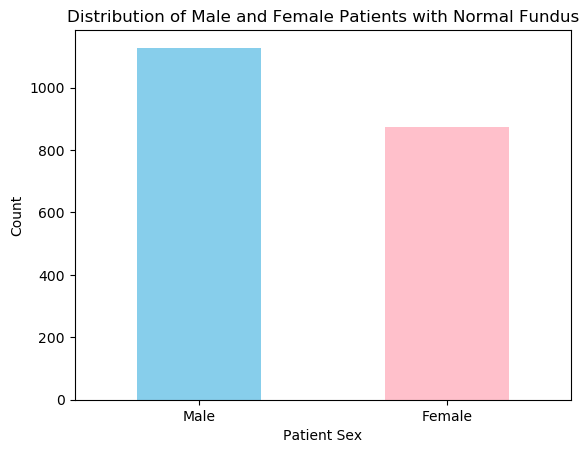

In [16]:
filtered_data = data[(data['Left-Diagnostic Keywords'] == 'normal fundus') & (data['Right-Diagnostic Keywords'] == 'normal fundus')]

gender_counts = filtered_data['Patient Sex'].value_counts()
colors=['skyblue','pink']
gender_counts.plot(kind='bar', rot=0,color=colors)

plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Patients with Normal Fundus')

plt.show()

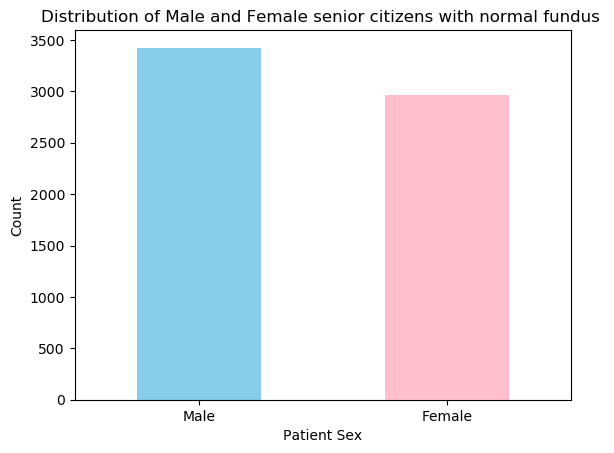

In [15]:
senior_citizens = data[(data['Left-Diagnostic Keywords'] == 'normal fundus') & (data['Right-Diagnostic Keywords'] == 'normal fundus') &(data['Patient Age'] >= 65)]
colors=['skyblue','pink']
gender_counts.plot(kind='bar', rot=0,color=colors)

plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.title('Distribution of Male and Female senior citizens with normal fundus ')
plt.show()

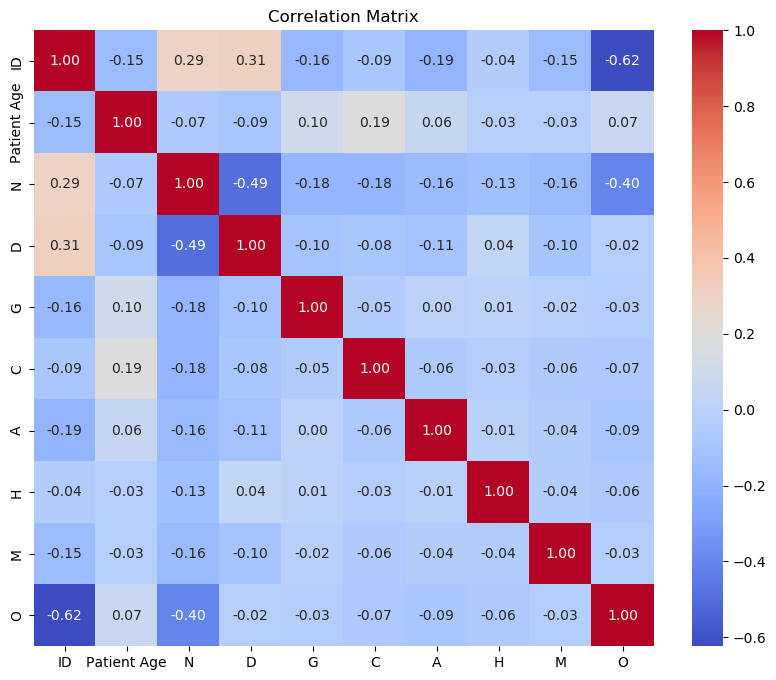

In [21]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:


#data[data.O==1].head(20)  #drusen or epiretinal membrane

def process_dataset(data):
    #create 2 more columns labelling them whether right or left cataract
    data["left_cataract"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("cataract",x))
    data["right_cataract"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("cataract",x))
  
    data["LD"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy",x))
    data["RD"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("non proliferative retinopathy",x))

    data["LG"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma",x))
    data["RG"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("glaucoma",x))
    
    data["LH"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive",x))
    data["RH"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("hypertensive",x))

    data["LM"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("myopia",x))
    data["RM"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("myopia",x))
    
    data["LA"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration",x))
    data["RA"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("macular degeneration",x))
    
    data["LO"] = data["Left-Diagnostic Keywords"].apply(lambda x: has_condn("drusen",x))
    data["RO"] = data["Right-Diagnostic Keywords"].apply(lambda x: has_condn("drusen",x))
    
    #store the right/left cataract images ids in a array
    left_cataract_images = data.loc[(data.C ==1) & (data.left_cataract == 1)]["Left-Fundus"].values
    right_cataract_images = data.loc[(data.C == 1) & (data.right_cataract == 1)]["Right-Fundus"].values
  
    #store the left/right normal image ids in a array
    left_normal = data.loc[(data.C == 0) & (data["Left-Diagnostic Keywords"] == "normal fundus")]['Left-Fundus'].sample(350,random_state=42).values
    right_normal = data.loc[(data.C == 0) & (data["Right-Diagnostic Keywords"] == "normal fundus")]['Right-Fundus'].sample(350,random_state=42).values
    
    #store the left/right diabetes image ids
    left_diab = data.loc[(data.C == 0) & (data.LD == 1)]["Left-Fundus"].values
    right_diab = data.loc[(data.C == 0) & (data.RD == 1)]["Right-Fundus"].values 

    #store the left/right glaucoma image ids
    left_glaucoma = data.loc[(data.C == 0) & (data.LG == 1)]["Left-Fundus"].values
    right_glaucoma = data.loc[(data.C == 0) & (data.RG == 1)]["Right-Fundus"].values 
    
    #store the left/right diabetes image ids
    left_hyper = data.loc[(data.C == 0) & (data.LH == 1)]["Left-Fundus"].values
    right_hyper = data.loc[(data.C == 0) & (data.RH == 1)]["Right-Fundus"].values 
    
    #store the left/right diabetes image ids
    left_myopia = data.loc[(data.C == 0) & (data.LM == 1)]["Left-Fundus"].values
    right_myopia = data.loc[(data.C == 0) & (data.RM == 1)]["Right-Fundus"].values 
    
    #store the left/right diabetes image ids
    left_age = data.loc[(data.C == 0) & (data.LA == 1)]["Left-Fundus"].values
    right_age = data.loc[(data.C == 0) & (data.RA == 1)]["Right-Fundus"].values 
    
    #store the left/right diabetes image ids
    left_other = data.loc[(data.C == 0) & (data.LO == 1)]["Left-Fundus"].values
    right_other = data.loc[(data.C == 0) & (data.RO == 1)]["Right-Fundus"].values 
    
    normalones = np.concatenate((left_normal,right_normal),axis = 0)
    cataractones = np.concatenate((left_cataract_images,right_cataract_images),axis = 0)
    diabones = np.concatenate((left_diab,right_diab),axis = 0)
    glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis = 0)
    hyper = np.concatenate((left_hyper,right_hyper),axis = 0)
    myopia = np.concatenate((left_myopia,right_myopia),axis = 0)
    age = np.concatenate((left_age,right_age),axis=0)
    other = np.concatenate((left_other,right_other),axis = 0)
    
    return normalones,cataractones,diabones,glaucoma,hyper,myopia,age,other

In [29]:
normal , cataract , diab, glaucoma , hyper , myopia , age, other = process_dataset(data)

print("Dataset stats::")
print("Normal ::" , len(normal))
print("Cataract ::" , len(cataract))
print("Diabetes ::" , len(diab))
print("Glaucoma ::" , len(glaucoma))
print("Hypertension ::" , len(hyper))
print("Myopia ::" , len(myopia))
print("Age Issues ::" , len(age))
print("Other ::" , len(other))



Dataset stats::
Normal :: 700
Cataract :: 594
Diabetes :: 1818
Glaucoma :: 610
Hypertension :: 374
Myopia :: 479
Age Issues :: 551
Other :: 324


In [30]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "D:\\SKAY\\Projects\\KEEP\\VScode\\Ocular Recognition Disease\\ocular_data\\preprocessed_images"
image_size=224
labels = []
dataset = []
def dataset_generator(imagecategory , label):
    for img in tqdm(imagecategory):
        imgpath = os.path.join(dataset_dir,img)
        
        #now we try to read the image and resize it accordingly
        try:
            image = cv2.imread(imgpath,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    
    return dataset

Generating Dataset

In [32]:
# Normal == 0
# Cataract == 1
# Diabetes == 2
# Glaucoma == 3
# HyperTension == 4
# Myopia == 5
# Age == 6
# Other == 7
import os

dataset = dataset_generator(normal,0)
dataset = dataset_generator(cataract,1)
dataset = dataset_generator(diab,2)
dataset = dataset_generator(glaucoma,3)
dataset = dataset_generator(hyper,4)
dataset = dataset_generator(myopia,5)
dataset = dataset_generator(age,6)
dataset = dataset_generator(other,7)

len(dataset)


100%|██████████| 324/324 [00:04<00:00, 65.15it/s] 


5396

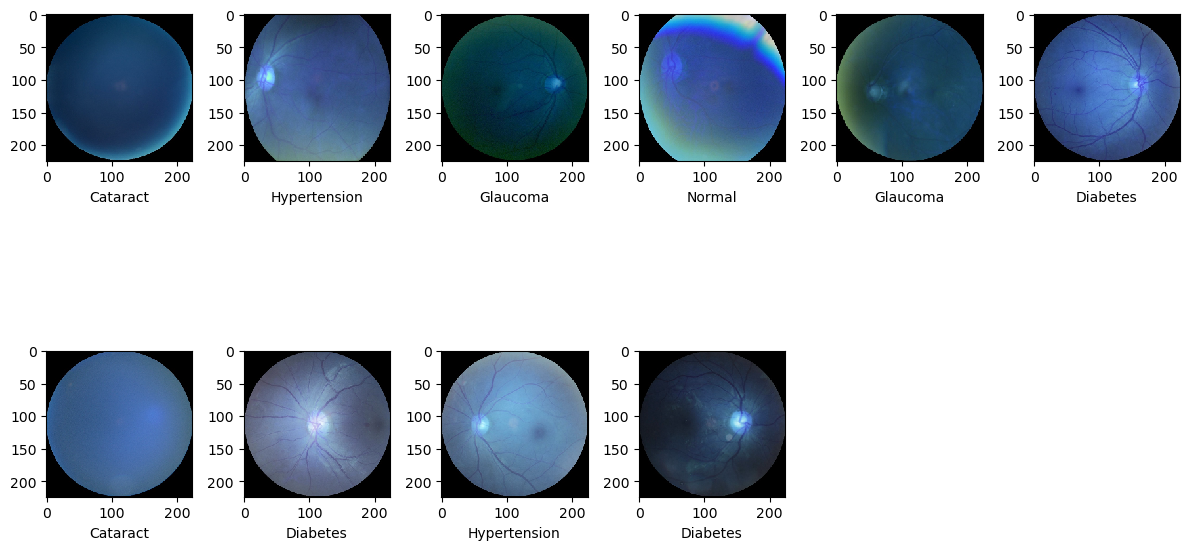

In [34]:
#the idea of looping the data set to view which is for which
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    
    if category== 0:
        label = "Normal"
    elif category == 1 :
        label = "Cataract"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Age Issues"
    else:
        label = "Other"
           
    plt.subplot(2,6,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()    

In [35]:
#Divide the dataset into 2 predictors and target...
#here predictors would be the image and target would be the label

train_x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
train_y = np.array([i[1] for i in dataset])

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#splitting the dataset
x_train , x_test , y_train, y_test = train_test_split(train_x,train_y, test_size=0.2)

y_train_cat = to_categorical(y_train,num_classes=8)

y_test_cat = to_categorical(y_test,num_classes = 8)


Creating the Model

In [39]:
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

for layer in vgg.layers:
    layer.trainable = False

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256,activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(8,activation="softmax"))

model.summary()

80142336/80134624 [==============================] - 26s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
________________________________________________________

In [40]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
#u might have to apply train_generator and test_generator
history = model.fit(x_train,y_train_cat,batch_size=32,epochs=15)
print(history)

Epoch 1/15
135/135 [==============================] - 2907s 22s/step - loss: 1.4123 - accuracy: 0.5255
Epoch 2/15
135/135 [==============================] - 2579s 19s/step - loss: 0.7448 - accuracy: 0.7380
Epoch 3/15
135/135 [==============================] - 2674s 20s/step - loss: 0.4594 - accuracy: 0.8543
Epoch 4/15
135/135 [==============================] - 2437s 18s/step - loss: 0.3359 - accuracy: 0.8997
Epoch 5/15
135/135 [==============================] - 8087s 60s/step - loss: 0.2724 - accuracy: 0.9217
Epoch 6/15
135/135 [==============================] - 2198s 16s/step - loss: 0.2436 - accuracy: 0.9298
Epoch 7/15
135/135 [==============================] - 2334s 17s/step - loss: 0.2248 - accuracy: 0.9326
Epoch 8/15
135/135 [==============================] - 2549s 19s/step - loss: 0.1938 - accuracy: 0.9423
Epoch 9/15
135/135 [==============================] - 2409s 18s/step - loss: 0.1884 - accuracy: 0.9398
Epoch 10/15
135/135 [==============================] - 2273s 17s/step - l

In [41]:
loss,accuracy = model.evaluate(x_test,y_test_cat)
print("Accuracy:",accuracy)

34/34 [==============================] - 629s 19s/step - loss: 1.0820 - accuracy: 0.7676
Accuracy: 0.7675926089286804


In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# y_pred = np.array((model.predict(x_test) > 0.5).astype("int32"))

y_pred = []
for i in model.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

print(y_pred)

[1, 0, 2, 2, 0, 1, 3, 2, 7, 0, 2, 3, 2, 5, 1, 2, 0, 7, 2, 2, 2, 0, 2, 3, 2, 7, 3, 2, 2, 1, 1, 2, 4, 0, 4, 4, 3, 2, 5, 6, 6, 6, 2, 4, 5, 3, 2, 2, 6, 1, 2, 1, 3, 3, 5, 4, 2, 0, 2, 0, 1, 2, 3, 4, 0, 0, 7, 2, 2, 2, 2, 4, 2, 5, 0, 5, 5, 6, 2, 7, 7, 3, 2, 2, 5, 2, 6, 6, 3, 1, 0, 0, 2, 6, 4, 2, 5, 2, 2, 0, 1, 6, 0, 2, 6, 0, 3, 3, 6, 0, 3, 3, 0, 2, 0, 1, 2, 2, 3, 1, 2, 4, 0, 6, 7, 0, 6, 0, 4, 3, 0, 3, 1, 0, 7, 2, 1, 2, 6, 7, 1, 1, 7, 2, 2, 2, 3, 0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 5, 1, 3, 3, 2, 2, 3, 3, 0, 0, 3, 6, 5, 2, 2, 4, 5, 7, 5, 6, 2, 1, 4, 2, 2, 2, 3, 2, 0, 3, 2, 2, 0, 1, 2, 6, 6, 3, 2, 0, 2, 2, 6, 1, 6, 2, 2, 4, 6, 2, 0, 7, 2, 3, 1, 2, 0, 4, 0, 2, 6, 3, 2, 2, 3, 0, 2, 2, 2, 1, 2, 5, 2, 0, 2, 2, 1, 3, 1, 6, 3, 7, 6, 5, 3, 3, 2, 7, 6, 1, 5, 0, 2, 5, 3, 2, 1, 3, 7, 0, 0, 2, 0, 6, 2, 6, 2, 4, 2, 4, 2, 3, 1, 6, 2, 2, 1, 2, 3, 2, 6, 0, 1, 3, 0, 0, 2, 1, 5, 4, 2, 0, 2, 7, 3, 2, 0, 1, 3, 0, 1, 2, 7, 2, 6, 5, 2, 0, 3, 1, 6, 7, 2, 2, 2, 3, 1, 3, 3, 3, 2, 1, 6, 3, 0, 2, 4, 2, 2, 0, 5, 7, 2, 2, 2, 6, 

In [43]:
print(accuracy_score(y_test,y_pred))

0.7675925925925926


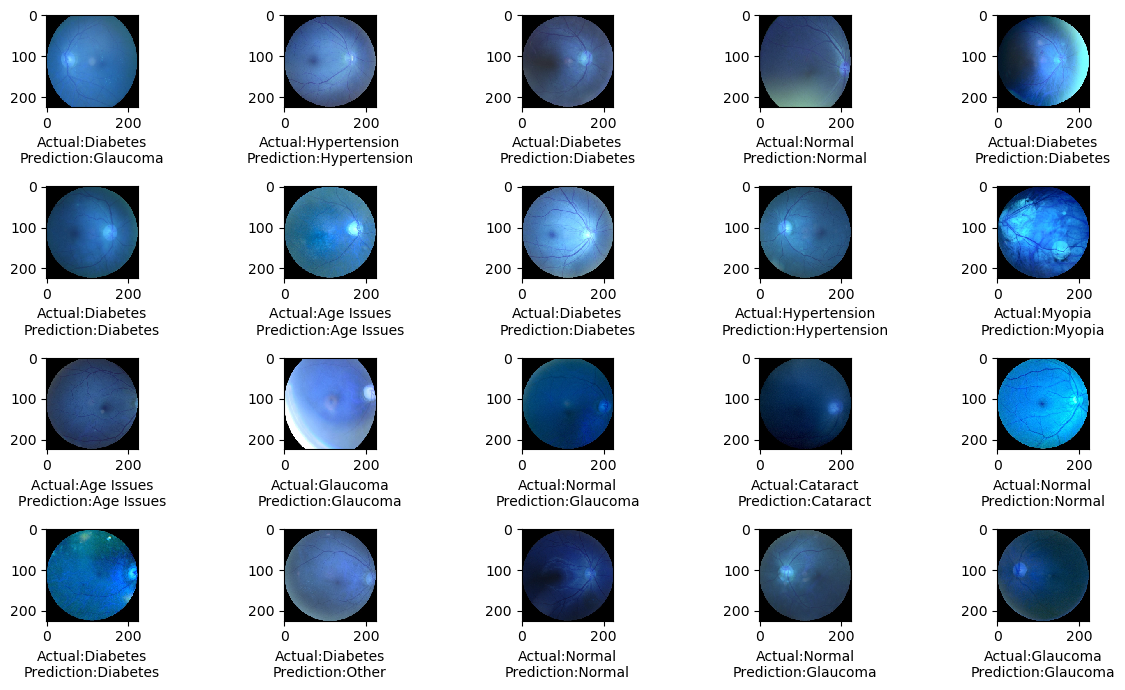

In [44]:
plt.figure(figsize=(12,7))
for i in range(20):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 0:
        label = "Normal"
    elif category == 1 :
        label = "Cataract"
    elif category == 2:
        label = "Diabetes"
    elif category == 3:
        label = "Glaucoma"
    elif category == 4:
        label = "Hypertension"
    elif category == 5:
        label = "Myopia"
    elif category == 6:
        label = "Age Issues"
    else:
        label = "Other"
        
    if pred_category== 0:
        pred_label = "Normal"
    elif pred_category == 1 :
        pred_label = "Cataract"
    elif pred_category == 2:
        pred_label = "Diabetes"
    elif pred_category == 3:
        pred_label = "Glaucoma"
    elif pred_category == 4:
        pred_label = "Hypertension"
    elif pred_category == 5:
        pred_label = "Myopia"
    elif pred_category == 6:
        pred_label = "Age Issues"
    else:
        pred_label = "Other"
        
    plt.subplot(4,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 


In [45]:
model.save("my_occular_trained_model.h5")

In [48]:
from tensorflow.keras.models import load_model
model = load_model('my_occular_trained_model.h5')

In [49]:
new_image_path = "D:\\SKAY\\Projects\\KEEP\\VScode\\Ocular Recognition Disease\\ocular_data\\ODIR-5K\\ODIR-5K\\Testing Images\\937_right.jpg" 
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (224, 224)) 
new_image = new_image / 255.0  

# Perform inference
predictions = model.predict(np.expand_dims(new_image, axis=0))

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Now 'predicted_class' contains the predicted class label for the new image
print(f"Actual: {label}")
print(f"Predicted class: {pred_label}")

Actual: Glaucoma
Predicted class: Glaucoma
